# Loading Modules

In [34]:
from main import MulLingVectorsAnnoy
from src import query, get, processing, evaluate
import imp
imp.reload(query)
imp.reload(get)
imp.reload(evaluate)
print('Hello World!')

Hello World!


# Instancing Model

### Parameters

In [8]:
# -------- Default -------- #
methods = ['baa','bai','meta','laser','metalaser']
paths = [1, 1, 1, 1, 1]
langs = ['en','zh','ms','ta']

In [4]:
my_object = MulLingVectorsAnnoy(methods=methods, paths=paths, langs=langs)

Importing FastText Vectors for en
Reading word vectors from dump/en/wordvecs.txt
Importing articles from dump/en/articles.pkl
Language dependencies loaded.
Loading document vectors from annoy/en/baa1.ann.
Loading document vectors from annoy/en/bai1.ann.
Loading document vectors from annoy/en/meta1.ann.
Loading document vectors from annoy/en/laser1.ann.
Loading document vectors from annoy/en/metalaser1.ann.
Importing FastText Vectors for zh
Reading word vectors from dump/zh/wordvecs.txt
Importing articles from dump/zh/articles.pkl
Language dependencies loaded.
Loading document vectors from annoy/zh/baa1.ann.
Loading document vectors from annoy/zh/bai1.ann.
Loading document vectors from annoy/zh/meta1.ann.
Loading document vectors from annoy/zh/laser1.ann.
Loading document vectors from annoy/zh/metalaser1.ann.
Importing FastText Vectors for ms
Reading word vectors from dump/ms/wordvecs.txt
Importing articles from dump/ms/articles.pkl
Language dependencies loaded.
Loading document vectors

### Sample Queries

Monolingual

In [29]:
results = query.monolingual_annoy_query(my_object, 'ice cream', 'bai', 'en', 12)
get._getresults(my_object, results)

1. Cheap & Good: Ice cream and waffles steal the show at Lickety
2. Cool, dairy-free, vegan decadence
3. Make a dreamy no-churn matcha ice cream
4. Make a melon sorbet even careful eaters can enjoy
5. Hipster treats a 'touch of magic'
6. FairPrice restricts sale of alcoholic ice cream
7. Make an ombre strawberry shortcake
8. Warm, wet key to ice being sticky
9. A chocolate coffee tart for chocoholics
10. A healthier choice
11. Pudding in a jiffy
12. Cake inspired by bandung


Multilingual

In [30]:
k = 40
q = 'ice cream'
multilingual = True
results = query.mulling_annoy_query(my_object, q, 'bai', k=k, multilingual=multilingual)
get._getresults(my_object, results)

{'en': 0.9548902153968811, 'zh': 1.2288862138986587, 'ms': 1.323330757021904, 'ta': 1.2606688141822815}
1. Cheap & Good: Ice cream and waffles steal the show at Lickety
2. Cool, dairy-free, vegan decadence
3. 研究：瑞士冰川过去5年缩小10%
4. Make a dreamy no-churn matcha ice cream
5. 南极冰川现巨型洞穴 科学家担心加速融冰
6. Bersyukur dan tidak pulang hampa lihat keindahan alam di Finland
7. Make a melon sorbet even careful eaters can enjoy
8. ஏலக்காய் காப்பி சாக்லெட் சிப்ஸ் குக்கீஸ்
9. 研究发现格陵兰冰盖融化释放大量甲烷
10. 新疆天山一号冰川消融“加速” 50年后或彻底消失
11. 研究：北冰洋将在2044年到2067年某个夏天完全融化
12. Sarapan
13. எண்ணெய் வழியும் முகத்தைச் சரிசெய்ய ஆரஞ்சு பழச்சுளை
14. Kapal angkasa Amerika 'New Horizon' hantar isyarat pada tahun baru
15. Tokyo chains Maple Mania, Tokyo Milk Cheese Factory to open here
16. Hipster treats a 'touch of magic'
17. 北极冻土突然融化可能加速全球变暖
18. 1,000 கர்ப்பிணிகளுக்கு அமைச்சர்கள் வளைகாப்பு
19. 北极冰层融化给海洋生物“加餐”
20. Biru
21. Kotak Impian
22. FairPrice restricts sale of alcoholic ice cream
23. மல்லித்தூள் தடவிய குறும்பாட்டு வறுவல்
24. 北京

Precision and Recall

In [9]:
print('Precision: %.3f' % evaluate._evaluate_precision(my_object, results))
print('Recall: %.3f' % evaluate._evaluate_recall(my_object, results, q, k=k))

Precision: 0.385
Recall: 0.200


# Evaluate

In [35]:
my_evaluator = evaluate.Evaluator('dump/nq.csv', methods=[1,2,3,4], k=12, L=3, MulLingObject=my_object)

20 % of queries processed.
40 % of queries processed.
60 % of queries processed.
80 % of queries processed.
100 % of queries processed.


In [36]:
my_evaluator.tabulate()

Model  \
Queries                                                             
Unmanned space probe New Horizons makes a close... 0        Title   
                                                   1  BWE-Agg-Add   
                                                   2  BWE-Agg-IDF   
                                                   3        LASER   
                                                   4   LASER-meta   
...                                                           ...   
Opposition politician Lim Tean is issued a corr... 0        Title   
                                                   1  BWE-Agg-Add   
                                                   2  BWE-Agg-IDF   
                                                   3        LASER   
                                                   4   LASER-meta   

                                                     Article1/Ranking  \
Queries                                                                 
Unmanned space probe New Horizons makes a close... 0      (20707, zh)   
                                                   1         0.373195   
                                                   2         0.399749   
                                                   3         0.641445   
                                                   4         0.547589   
...                                                               ...   
Opposition politician Lim Tean is issued a corr... 0      (23291, zh)   
                                                   1          0.55767   
                                                   2         0.578923   
                                                   3         0.606099   
                                                   4         0.621611   

                                                     Article2/Ranking  \
Queries                                                                 
Unmanned space probe New Horizons makes a close... 0      (92748, en)   
                                                   1          0.46471   
                                                   2         0.474134   
                                                   3         0.336282   
                                                   4         0.522533   
...                                                               ...   
Opposition politician Lim Tean is issued a corr... 0       (2521, ta)   
                                                   1         0.461584   
                                                   2         0.436031   
                                                   3         0.311768   
                                                   4         0.597156   

                                                     Article3/Ranking  \
Queries                                                                 
Unmanned space probe New Horizons makes a close... 0     (101786, en)   
                                                   1         0.421219   
                                                   2          0.42618   
                                                   3         0.493624   
                                                   4         0.620728   
...                                                               ...   
Opposition politician Lim Tean is issued a corr... 0        (160, ms)   
                                                   1         0.431987   
                                                   2         0.430894   
                                                   3         0.672617   
                                                   4         0.635904   

                                                     Article4/Ranking  \
Queries                                                                 
Unmanned space probe New Horizons makes a close... 0        (250, ms)   
                                                   1         0.201881   
                    

Ensemble is 0.271x of BAA, 0.223x of BAI, 0.280x of LASER and 0.250x of meta LASERs


## Exploratory Data Analysis

<IPython.core.display.Javascript object>


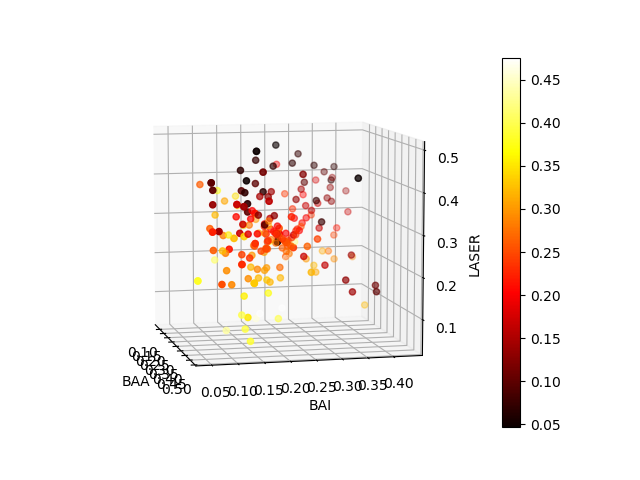

In [51]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib notebook

fig = plt.figure()
ax = plt.axes(projection='3d')
data = list(zip(my_evaluator.ensembles))

img = ax.scatter3D(data[0][0], data[1][0], data[2][0], c=data[3][0], cmap=plt.hot())
ax.set_xlabel('BAA')
ax.set_ylabel('BAI')
ax.set_zlabel('LASER')
fig.colorbar(img)

plt.show()

<IPython.core.display.Javascript object>


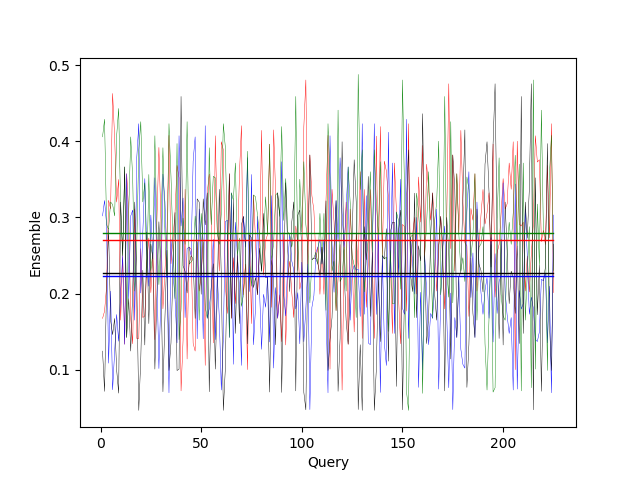

In [40]:
from statistics import mean
x = np.arange(1, len(data[0][0])+1, 1)

fig = plt.figure()

plt.plot(x, data[0][0], 'r', x, data[1][0],'b', x, data[2][0], 'g', x, data[3][0], 'k', linewidth=0.3)
plt.plot(x, [mean(data[0][0]) for k in x], 'r', x, [mean(data[1][0]) for k in x],'b', x, [mean(data[2][0]) for k in x], 'g', x, [mean(data[3][0]) for k in x], 'k', linewidth=1)
plt.ylabel('Ensemble')
plt.xlabel('Query')
plt.show()

# Misc

In [55]:
from math import floor, log
from annoy import AnnoyIndex
import pickle

a = pickle.load(open('pickle/metalasers_new.pkl', 'rb'))
for lang in a:
    t = AnnoyIndex(1024, 'angular')  # Length of item vector that will be indexed
    for i in range(len(a[lang])):
        t.add_item(i, a[lang][i][0])

    t.build(floor(log(len(a[lang])))) # 10 trees
    t.save('annoy/%s/%s1.ann' % (lang, 'metalaser'))